In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from ucimlrepo import fetch_ucirepo
credit = fetch_ucirepo(id=27)
credit

{'data': {'ids': None,
  'features':      A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
  0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
  1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
  2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
  3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
  4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
  ..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
  685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
  686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
  687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
  688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
  689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b
  
  [690 rows x 15 columns],
  'targets':     A16
  

In [3]:
pd.concat([credit.data.features,credit.data.targets],axis=1).to_csv('data/feature-engine/credit.csv',index=False)

In [4]:
data = pd.read_csv('data/feature-engine/credit.csv')
profile=ProfileReport(data)
profile.to_file('outputs/credit-profile.html')

C:\Users\kyse1\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.isna().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
A16     0
dtype: int64

In [6]:
data

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,A16
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,+
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,+
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,+
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,+
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b,-
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a,-
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a,-
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b,-


In [7]:
data['A16'].replace(to_replace={'+':1,'-':0},inplace=True)
import random
random.seed(9001)
values=[random.randint(0,len(data)) for p in range(0,100)]
for var in ['A3','A8','A9','A10']:
    data.loc[values,var] = np.nan
data.info()
data.to_csv('data/feature-engine/creditApprovalUCI.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     598 non-null    object 
 6   A9      598 non-null    object 
 7   A8      598 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      598 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [8]:
data = pd.read_csv('data/feature-engine/creditApprovalUCI.csv')
data.isnull().mean()

A15    0.000000
A14    0.018841
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.133333
A9     0.133333
A8     0.133333
A7     0.013043
A6     0.013043
A5     0.008696
A4     0.008696
A3     0.133333
A2     0.017391
A1     0.017391
A16    0.000000
dtype: float64

In [9]:
data_clean=data.dropna()

In [10]:
print(f"Size of Original Data: {len(data)}")
print(f"Size of Cleaned Data: {len(data_clean)}")

Size of Original Data: 690
Size of Cleaned Data: 564


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer

In [12]:
x=data.drop('A16',axis=1)
y=data[['A16']]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 15), (207, 15), (483, 1), (207, 1))

In [14]:
x_train.isnull().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.140787
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.140787
A2     0.022774
A1     0.008282
dtype: float64

In [15]:
x_train.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
dtype: object

In [16]:
num_vars = x_train.select_dtypes(include=[np.float64,np.int64]).columns
num_vars

for var in num_vars:
    value = x_train[var].median()
    x_train[var].fillna(value,inplace=True)
    x_test[var].fillna(value,inplace=True)
x_train.isnull().mean()

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

In [17]:
#With scikit
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.3,random_state=0)
imputer = SimpleImputer(strategy='median')


In [18]:
imputer.fit(x_train[num_vars])
imputer.statistics_

SimpleImputer(strategy='median')

array([  6.   , 136.   ,   0.   ,   1.165,   3.   ,  28.5  ])

In [19]:
x_train[num_vars]=imputer.transform(x_train[num_vars])
x_test[num_vars]=imputer.transform(x_test[num_vars])
x_train.isnull().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.149758
A9     0.149758
A8     0.000000
A7     0.004831
A6     0.004831
A5     0.004831
A4     0.004831
A3     0.000000
A2     0.000000
A1     0.009662
dtype: float64

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output="pandas")

num_imputer=SimpleImputer(strategy='median')
preprocessor=ColumnTransformer(transformers=[
                                ('median_imputer',num_imputer,num_vars)],
                               remainder='passthrough')
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.3,random_state=0)
preprocessor.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object'))])

In [21]:
x_train
x_test

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
493,0,340.0,g,f,0,f,t,6.000,h,c,g,u,11.835,20.50,a
653,68,100.0,g,t,0,f,t,0.500,v,i,g,u,11.500,21.50,b
610,4,140.0,g,f,0,f,f,0.125,v,k,p,y,1.250,20.00,b
587,0,0.0,g,f,9,t,t,8.500,v,c,g,u,15.000,51.58,b
255,13,320.0,g,f,0,f,f,1.085,h,c,g,u,10.250,18.17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,160.0,g,f,0,f,f,0.000,ff,ff,g,u,4.710,36.75,a
192,600,510.0,g,f,0,f,t,2.500,v,x,g,u,0.960,41.75,b
629,5,220.0,g,f,0,f,f,1.665,v,w,g,u,0.665,19.58,a
559,2384,140.0,g,t,7,t,t,2.290,h,q,g,u,2.290,22.83,a


,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
14,0,0.0,g,t,7,t,t,5.000,v,q,g,u,10.500,45.83,a
586,1000,0.0,g,t,9,t,t,17.500,h,x,g,u,20.000,64.08,b
140,0,181.0,g,t,9,t,t,0.625,h,cc,g,u,3.750,31.25,a
492,4607,240.0,g,f,14,t,t,6.500,v,m,g,u,9.500,39.25,b
350,1,276.0,g,t,0,f,f,0.000,j,j,g,u,2.000,26.17,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0,225.0,g,t,0,NaN,NaN,NaN,v,m,g,u,NaN,48.50,b
254,2010,380.0,g,f,0,f,f,0.250,v,k,g,u,0.625,NaN,b
437,27,62.0,s,t,0,f,f,0.000,ff,ff,g,u,0.165,53.33,a
382,456,200.0,g,f,0,f,f,4.500,bb,i,p,y,2.500,24.33,a


In [22]:
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)
x_train.isnull().mean()

median_imputer__A15    0.000000
median_imputer__A14    0.000000
median_imputer__A11    0.000000
median_imputer__A8     0.000000
median_imputer__A3     0.000000
median_imputer__A2     0.000000
remainder__A13         0.000000
remainder__A12         0.000000
remainder__A10         0.149758
remainder__A9          0.149758
remainder__A7          0.004831
remainder__A6          0.004831
remainder__A5          0.004831
remainder__A4          0.004831
remainder__A1          0.009662
dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
categoric_vars = X_train.select_dtypes(exclude=[np.float64,np.int64]).columns
categoric_vars

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [24]:
X_train[categoric_vars].isnull().mean()

A13    0.000000
A12    0.000000
A10    0.140787
A9     0.140787
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A1     0.008282
dtype: float64

In [25]:
X_train['A13'].mode()[0]

'g'

In [26]:
for var in categoric_vars:
    value = X_train[var].mode()[0]
    X_train[var].fillna(value,inplace=True)
    X_test[var].fillna(value,inplace=True)
X_train[categoric_vars].isnull().mean()

A13    0.0
A12    0.0
A10    0.0
A9     0.0
A7     0.0
A6     0.0
A5     0.0
A4     0.0
A1     0.0
dtype: float64

In [27]:
#with scikitlearn
categoric_imputer=SimpleImputer(strategy='most_frequent')

preprocessor=ColumnTransformer(transformers=[
                                ('categoric_imputer',categoric_imputer,categoric_vars)],
                               remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [28]:
X_train
X_test

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
596,4159,396.0,g,t,8,t,t,2.375,v,c,g,u,3.000,46.08,a
303,0,120.0,g,f,0,f,f,0.085,v,q,g,u,2.875,15.92,a
204,1187,50.0,g,f,1,t,t,0.085,v,w,p,y,2.125,36.33,b
351,0,100.0,g,f,0,f,f,0.000,ff,ff,p,y,0.585,22.17,b
118,1332,360.0,g,t,6,t,t,14.000,v,m,g,u,7.040,57.83,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,160.0,g,f,0,f,f,0.000,ff,ff,g,u,4.710,36.75,a
192,600,510.0,g,f,0,f,t,2.500,v,x,g,u,0.960,41.75,b
629,5,220.0,g,f,0,f,f,1.665,v,w,g,u,0.665,19.58,a
559,2384,140.0,g,t,7,t,t,2.290,h,q,g,u,2.290,22.83,a


,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
14,0,0.0,g,t,7,t,t,5.000,v,q,g,u,10.50,45.83,a
586,1000,0.0,g,t,9,t,t,17.500,h,x,g,u,20.00,64.08,b
140,0,181.0,g,t,9,t,t,0.625,h,cc,g,u,3.75,31.25,a
492,4607,240.0,g,f,14,t,t,6.500,v,m,g,u,9.50,39.25,b
350,1,276.0,g,t,0,f,f,0.000,j,j,g,u,2.00,26.17,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1430,300.0,g,t,5,t,t,2.500,v,c,g,u,1.04,28.67,a
380,0,141.0,g,t,0,f,f,2.250,bb,i,g,u,5.00,43.17,b
369,2,132.0,g,t,0,NaN,NaN,NaN,n,r,p,y,NaN,21.42,b
362,0,100.0,g,f,0,NaN,NaN,NaN,ff,k,g,u,NaN,26.83,b


In [29]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_train.isnull().mean()

categoric_imputer__A13    0.000000
categoric_imputer__A12    0.000000
categoric_imputer__A10    0.000000
categoric_imputer__A9     0.000000
categoric_imputer__A7     0.000000
categoric_imputer__A6     0.000000
categoric_imputer__A5     0.000000
categoric_imputer__A4     0.000000
categoric_imputer__A1     0.000000
remainder__A15            0.000000
remainder__A14            0.014493
remainder__A11            0.000000
remainder__A8             0.140787
remainder__A3             0.140787
remainder__A2             0.022774
dtype: float64

In [30]:
#with feature_engine
from feature_engine.imputation import CategoricalImputer
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
ImputerEngine=CategoricalImputer(imputation_method='frequent',variables=categoric_vars.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

CategoricalImputer(imputation_method='frequent',
                   variables=['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4',
                              'A1'])

{'A13': 'g',
 'A12': 'f',
 'A10': 'f',
 'A9': 't',
 'A7': 'v',
 'A6': 'c',
 'A5': 'g',
 'A4': 'u',
 'A1': 'b'}

In [31]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.000000
A9     0.000000
A8     0.140787
A7     0.000000
A6     0.000000
A5     0.000000
A4     0.000000
A3     0.140787
A2     0.022774
A1     0.000000
dtype: float64

In [32]:
#Filling with chosen values
categoric_imputer=SimpleImputer(strategy='constant',fill_value='missing')
num_imputer=SimpleImputer(strategy='constant',fill_value=9999)

preprocessor=ColumnTransformer(transformers=[
    ('num_imputer',num_imputer,num_vars),
    ('categoric_imputer',categoric_imputer,categoric_vars)
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

((X_train=='missing')|(X_train==9999)).sum()

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imputer',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('categoric_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

num_imputer__A15           0
num_imputer__A14           7
num_imputer__A11           0
num_imputer__A8           68
num_imputer__A3           68
num_imputer__A2           11
categoric_imputer__A13     0
categoric_imputer__A12     0
categoric_imputer__A10    68
categoric_imputer__A9     68
categoric_imputer__A7      4
categoric_imputer__A6      4
categoric_imputer__A5      4
categoric_imputer__A4      4
categoric_imputer__A1      4
dtype: int64

In [33]:
from feature_engine.imputation import ArbitraryNumberImputer
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
ImputerEngine=ArbitraryNumberImputer(arbitrary_number=9999,variables=num_vars.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

ArbitraryNumberImputer(arbitrary_number=9999,
                       variables=['A15', 'A14', 'A11', 'A8', 'A3', 'A2'])

{'A15': 9999, 'A14': 9999, 'A11': 9999, 'A8': 9999, 'A3': 9999, 'A2': 9999}

In [34]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

In [35]:
#Filling with random values
from feature_engine.imputation import RandomSampleImputer
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

empty_a10_index = X_train[X_train.A10.isna()==True].index
empty_a14_index = X_train[X_train.A14.isna()==True].index

ImputerEngine = RandomSampleImputer(random_state=0)
ImputerEngine.fit(X_train)
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

RandomSampleImputer(random_state=0)

A15    0.0
A14    0.0
A13    0.0
A12    0.0
A11    0.0
A10    0.0
A9     0.0
A8     0.0
A7     0.0
A6     0.0
A5     0.0
A4     0.0
A3     0.0
A2     0.0
A1     0.0
dtype: float64

In [36]:
X_train.loc[empty_a10_index,:].A10.value_counts()

f    34
t    34
Name: A10, dtype: int64

In [37]:
X_train.loc[empty_a14_index,:]

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
206,0,350.0,p,f,0,f,f,0.000,v,c,g,u,0.000,71.58,a
243,26726,17.0,g,f,5,f,t,0.875,v,q,g,u,0.375,18.75,a
270,0,60.0,p,f,0,f,f,0.000,j,j,g,u,0.000,37.58,b
626,0,140.0,g,t,0,f,f,0.165,bb,i,p,y,7.835,22.00,b
592,0,381.0,p,f,0,f,f,0.000,h,i,p,y,0.000,23.17,b
445,5200,260.0,g,f,0,f,f,0.000,ff,ff,g,u,11.250,27.67,a
622,0,420.0,p,f,0,f,f,0.000,v,w,g,u,0.000,25.58,a


In [38]:
from feature_engine.imputation import AddMissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
ImputerEngine=AddMissingIndicator()
ImputerEngine.fit(X_train)
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

AddMissingIndicator()

A15       0.000000
A14       0.014493
A13       0.000000
A12       0.000000
A11       0.000000
A10       0.140787
A9        0.140787
A8        0.140787
A7        0.008282
A6        0.008282
A5        0.008282
A4        0.008282
A3        0.140787
A2        0.022774
A1        0.008282
A14_na    0.000000
A10_na    0.000000
A9_na     0.000000
A8_na     0.000000
A7_na     0.000000
A6_na     0.000000
A5_na     0.000000
A4_na     0.000000
A3_na     0.000000
A2_na     0.000000
A1_na     0.000000
dtype: float64

In [39]:
from sklearn.impute import MissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
indicator=MissingIndicator()
indicator.fit(X_train)
mi_train=indicator.transform(X_train)
X_train=pd.concat([X_train, mi_train], axis=1)
X_train.replace(to_replace={True:1,False:0})

MissingIndicator()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,...,missingindicator_A10,missingindicator_A9,missingindicator_A8,missingindicator_A7,missingindicator_A6,missingindicator_A5,missingindicator_A4,missingindicator_A3,missingindicator_A2,missingindicator_A1
596,4159,396.0,g,t,8,t,t,2.375,v,c,...,0,0,0,0,0,0,0,0,0,0
303,0,120.0,g,f,0,f,f,0.085,v,q,...,0,0,0,0,0,0,0,0,0,0
204,1187,50.0,g,f,1,t,t,0.085,v,w,...,0,0,0,0,0,0,0,0,0,0
351,0,100.0,g,f,0,f,f,0.000,ff,ff,...,0,0,0,0,0,0,0,0,0,0
118,1332,360.0,g,t,6,t,t,14.000,v,m,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,160.0,g,f,0,f,f,0.000,ff,ff,...,0,0,0,0,0,0,0,0,0,0
192,600,510.0,g,f,0,f,t,2.500,v,x,...,0,0,0,0,0,0,0,0,0,0
629,5,220.0,g,f,0,f,f,1.665,v,w,...,0,0,0,0,0,0,0,0,0,0
559,2384,140.0,g,t,7,t,t,2.290,h,q,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Filling with neighbors
from sklearn.impute import KNNImputer

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

X_train.A14[[206]]

imputer=KNNImputer(n_neighbors=5)
imputer.fit(X_train[num_vars])

X_train[num_vars]=imputer.transform(X_train[num_vars])
X_test[num_vars]=imputer.transform(X_test[num_vars])

X_train[num_vars].isna().sum()
X_train.A14[[206]]

206   NaN
Name: A14, dtype: float64

KNNImputer()

A15    0
A14    0
A11    0
A8     0
A3     0
A2     0
dtype: int64

206    331.8
Name: A14, dtype: float64

In [41]:
#with numerical values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), initial_strategy='mean', random_state=0)

variables = num_vars

imputer.fit(x_train[variables])

x_train[variables]=imputer.transform(x_train[variables])
x_test[variables]=imputer.transform(x_test[variables])
x_train.A14[[206]]

IterativeImputer(estimator=BayesianRidge(), random_state=0)

206    191.35808
Name: A14, dtype: float64

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.impute import IterativeImputer

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

imputer_dct = IterativeImputer(estimator = DecisionTreeRegressor(random_state=0),initial_strategy = 'mean',max_iter=100,random_state=0)
imputer_ext = IterativeImputer(estimator = ExtraTreesRegressor(random_state=0),initial_strategy='mean',max_iter=100,random_state=0)
imputer_knn = IterativeImputer(estimator = KNeighborsRegressor(), initial_strategy = 'mean', max_iter=100, random_state=0)

variables = num_vars

imputer_dct.fit(x_train[variables])
imputer_ext.fit(x_train[variables])
imputer_knn.fit(x_train[variables])

x_train_dct = imputer_dct.transform(x_train[variables])
x_test_dct = imputer_dct.transform(x_test[variables])
x_train_dct.A14[[206]]

x_train_ext = imputer_ext.transform(x_train[variables])
x_test_ext = imputer_ext.transform(x_test[variables])
x_train_ext.A14[[206]]

x_train_knn = imputer_knn.transform(x_train[variables])
x_test_knn = imputer_knn.transform(x_test[variables])
x_train_knn.A14[[206]]

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=ExtraTreesRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=KNeighborsRegressor(), max_iter=100, random_state=0)

206    0.0
Name: A14, dtype: float64

206    106.7
Name: A14, dtype: float64

206    114.0
Name: A14, dtype: float64

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

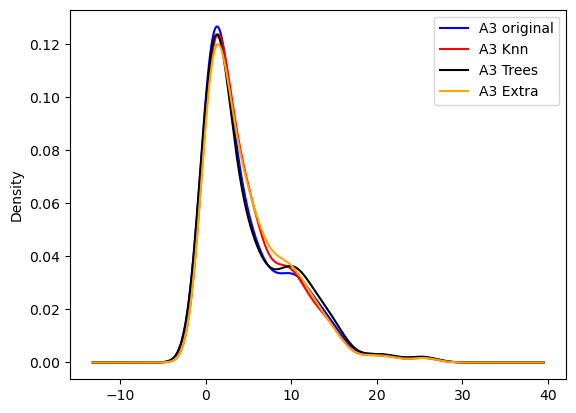

In [48]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['A3'].plot(kind='kde',ax=ax,color='blue')
x_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
x_train_dct['A3'].plot(kind='kde', ax=ax, color='black')
x_train_ext['A3'].plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original','A3 Knn', 'A3 Trees', 'A3 Extra']
ax.legend(lines,labels,loc='best')

plt.show()

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

cat_imputer_1 = SimpleImputer(strategy='constant', fill_value='missing')
cat_imputer_2 = SimpleImputer(strategy='most_frequent')

num_imputer_1 = SimpleImputer(strategy='constant',fill_value=9999)
num_imputer_2 = SimpleImputer(strategy='mean')
num_imputer_3 = IterativeImputer(estimator = KNeighborsRegressor(),
                                 initial_strategy='mean',
                                 max_iter=100, random_state=0)

preprocessor = ColumnTransformer(transformers=[
    ('cat_imputer_1', cat_imputer_1, categoric_vars[:2]),
    ('cat_imputer_2', cat_imputer_2, categoric_vars[2:]),
    ('num_imputer_1', num_imputer_1, num_vars[:2]),
    ('num_imputer_2', num_imputer_2, num_vars[2:4]),
    ('num_imputer_3', num_imputer_3, num_vars[4:]),
],remainder='passthrough')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

preprocessor.fit(x_train)
x_train=preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)
((x_train=='missing') | (x_train==9999)).sum()

C:\Users\kyse1\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_imputer_1',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12'], dtype='object')),
                                ('cat_imputer_2',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')),
                                ('num_imputer_1',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 Index(['A15', 'A14'], dtype='object')),
                                ('num_imputer_2', SimpleImputer(),
                                 Index(['A11', 'A8'], dtype='object')),
                                ('num_imputer_3',
                                 IterativeImputer(estimator=KNeighborsRegressor(),
                                                  max_iter=100,
                                                  random_state=0),
                                 Index(['A3', 'A2'], dtype='object'))])

cat_imputer_1__A13    0
cat_imputer_1__A12    0
cat_imputer_2__A10    0
cat_imputer_2__A9     0
cat_imputer_2__A7     0
cat_imputer_2__A6     0
cat_imputer_2__A5     0
cat_imputer_2__A4     0
cat_imputer_2__A1     0
num_imputer_1__A15    0
num_imputer_1__A14    7
num_imputer_2__A11    0
num_imputer_2__A8     0
num_imputer_3__A3     0
num_imputer_3__A2     0
dtype: int64

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

from feature_engine.imputation import  CategoricalImputer, AddMissingIndicator, MeanMedianImputer, AddMissingIndicator

num_imputer_3 = IterativeImputer(estimator=KNeighborsRegressor(),
                                   initial_strategy='mean',
                                   max_iter=100, random_state=0)

preprocesor = ColumnTransformer(transformers=[
    ('num_imputer_3', num_imputer_3, num_vars[4:])
], remainder='passthrough')

imputer_pipe = Pipeline(steps=[
    ('c_imputer_1', CategoricalImputer(imputation_method='frequent', variables=categoric_vars[:2].to_list())),
    ('c_imputer_2', CategoricalImputer(imputation_method='missing', fill_value='missing', variables=categoric_vars[2:].to_list())),
    ('n_imputer_1', AddMissingIndicator(variables=num_vars[:2].to_list())),
    ('n_imputer_2', MeanMedianImputer(imputation_method='median',variables=num_vars[4:].to_list()))
    ('n_imputer_3', preprocessor)
])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

imputer_pipe.fit(x_train)
x_train=imputer_pipe.transform(x_train)
x_test=imputer_pipe.transform(x_test)
x_train.isna().sum()

<>:19: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:19: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\kyse1\AppData\Local\Temp\ipykernel_17768\1476967558.py:19: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('n_imputer_2', MeanMedianImputer(imputation_method='median',variables=num_vars[4:].to_list()))


TypeError: 'tuple' object is not callable